# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
# Load the cleaned dataset
clean_avia_df = pd.read_csv('data/Cleaned_AviationData.csv')


In [3]:
clean_avia_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Report_Date,N_passenger,Ser_inj_frac,is_destroyed,Make_model
0,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,YIP,WILLOW RUN,Non-Fatal,Substantial,...,1.0,VMC,Takeoff,Probable Cause,02-01-1983,1983-01-02,1.0,0.0,0,CESSNA_152
1,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,Fatal(3),Destroyed,...,0.0,VMC,NaN,Probable Cause,02-01-1983,1983-01-02,3.0,1.0,1,CESSNA_180
2,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,Fatal(2),Destroyed,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,2.0,1.0,1,BEECH_19
3,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,1.0,1.0,1,NAVION_A
4,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,...,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1983-01-02,1.0,1.0,1,CESSNA_R172K


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [5]:

# Convert injury columns to numeric (if not already)
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured']

for col in injury_cols:
    clean_avia_df[col] = pd.to_numeric(clean_avia_df[col], errors='coerce')
    
# Estimate total number of passengers
clean_avia_df['Estimated.Total.Passengers'] = clean_avia_df[injury_cols].sum(axis=1)

# Classify aircraft by size using threshold of 20 passengers
small_planes = clean_avia_df[clean_avia_df['Estimated.Total.Passengers'] < 20].copy()
large_planes = clean_avia_df[clean_avia_df['Estimated.Total.Passengers'] >= 20].copy()

# Display counts
print(f"Small aircraft: {len(small_planes)} records")
print(f"Large aircraft: {len(large_planes)} records")


Small aircraft: 50444 records
Large aircraft: 836 records


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [17]:
# Calculate Total Passengers first
clean_avia_df['Total.Passengers'] = (
    clean_avia_df['Total.Fatal.Injuries'] + 
    clean_avia_df['Total.Serious.Injuries'] + 
    clean_avia_df['Total.Minor.Injuries'] + 
    clean_avia_df['Total.Uninjured']
)

# Create plane size classification
clean_avia_df['Plane.Size'] = np.where(clean_avia_df['Total.Passengers'] < 20, 'Small', 'Large')

# Calculate serious/fatal injury rate
clean_avia_df['Serious.Fatal.Injury.Rate'] = (
    (clean_avia_df['Total.Fatal.Injuries'] + clean_avia_df['Total.Serious.Injuries']) / 
    clean_avia_df['Total.Passengers']
)

# Filter data
small_aircraft = clean_avia_df[clean_avia_df['Plane.Size'] == 'Small']
large_aircraft = clean_avia_df[clean_avia_df['Plane.Size'] == 'Large']

# Group by Make and calculate mean injury rate
small_risk = small_aircraft.groupby('Make')['Serious.Fatal.Injury.Rate'].mean().reset_index()
large_risk = large_aircraft.groupby('Make')['Serious.Fatal.Injury.Rate'].mean().reset_index()

# View
print("Top 10 Small Aircraft Makes with Lowest Serious/Fatal Injury Rate:")
print(small_risk.head(10))

print("\nTop 10 Large Aircraft Makes with Lowest Serious/Fatal Injury Rate:")
print(large_risk.head(10)) 

Top 10 Small Aircraft Makes with Lowest Serious/Fatal Injury Rate:
                         Make  Serious.Fatal.Injury.Rate
0              AERO COMMANDER                   0.372417
1                     AERONCA                   0.250915
2                AEROSPATIALE                   0.335330
3                    AEROSTAR                   0.500000
4                 AIR TRACTOR                   0.235507
5             AIR TRACTOR INC                   0.289326
6                      AIRBUS                   0.666667
7            AIRBUS INDUSTRIE                   0.000000
8                    AMERICAN                   0.358333
9  AMERICAN CHAMPION AIRCRAFT                   0.250000

Top 10 Large Aircraft Makes with Lowest Serious/Fatal Injury Rate:
                Make  Serious.Fatal.Injury.Rate
0     AERO COMMANDER                   0.000000
1       AEROSPATIALE                   0.003388
2             AIRBUS                   0.044203
3   AIRBUS INDUSTRIE                   0.02344

In [18]:
# Get top 15 safest makes
top_15_small = small_risk.nsmallest(15, 'Serious.Fatal.Injury.Rate')
top_15_large = large_risk.nsmallest(15, 'Serious.Fatal.Injury.Rate')

print(top_15_small)
print(top_15_large)

                  Make  Serious.Fatal.Injury.Rate
7     AIRBUS INDUSTRIE                   0.000000
38   GRUMMAN-SCHWEIZER                   0.099727
67                WACO                   0.106183
39               HELIO                   0.120766
16              BOEING                   0.146617
29             ENSTROM                   0.152263
46               MAULE                   0.157029
11  AVIAT AIRCRAFT INC                   0.157143
40              HILLER                   0.166667
65          SWEARINGEN                   0.172631
61           SCHWEIZER                   0.179592
64             STINSON                   0.189647
10               AVIAT                   0.192593
68           WEATHERLY                   0.197368
35             GRUMMAN                   0.199589
                         Make  Serious.Fatal.Injury.Rate
0              AERO COMMANDER                   0.000000
10                DEHAVILLAND                   0.000000
20                 SWEARINGEN

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\2317569683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_small, x='Make', y='Serious.Fatal.Injury.Rate', ax=axes[0], palette='crest')
C:\Users\babur\AppData\Local\Temp\ipykernel_18192\2317569683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_large, x='Make', y='Serious.Fatal.Injury.Rate', ax=axes[1], palette='viridis')


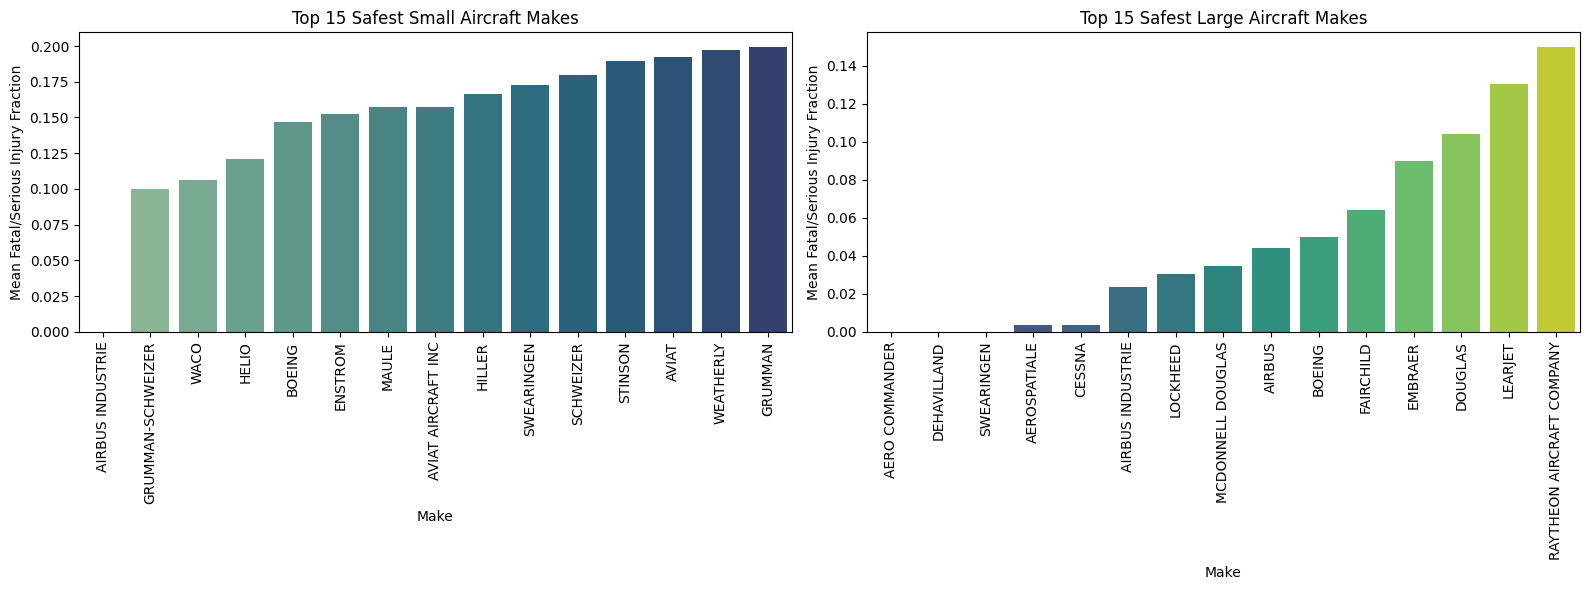

In [30]:
# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=top_15_small, x='Make', y='Serious.Fatal.Injury.Rate', ax=axes[0], palette='crest')
axes[0].set_title("Top 15 Safest Small Aircraft Makes")
axes[0].set_ylabel("Mean Fatal/Serious Injury Fraction")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=top_15_large, x='Make', y='Serious.Fatal.Injury.Rate', ax=axes[1], palette='viridis')
axes[1].set_title("Top 15 Safest Large Aircraft Makes")
axes[1].set_ylabel("Mean Fatal/Serious Injury Fraction")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\3450586301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Make", y="Serious.Fatal.Injury.Rate", data=small_aircraft_top10, palette="crest")


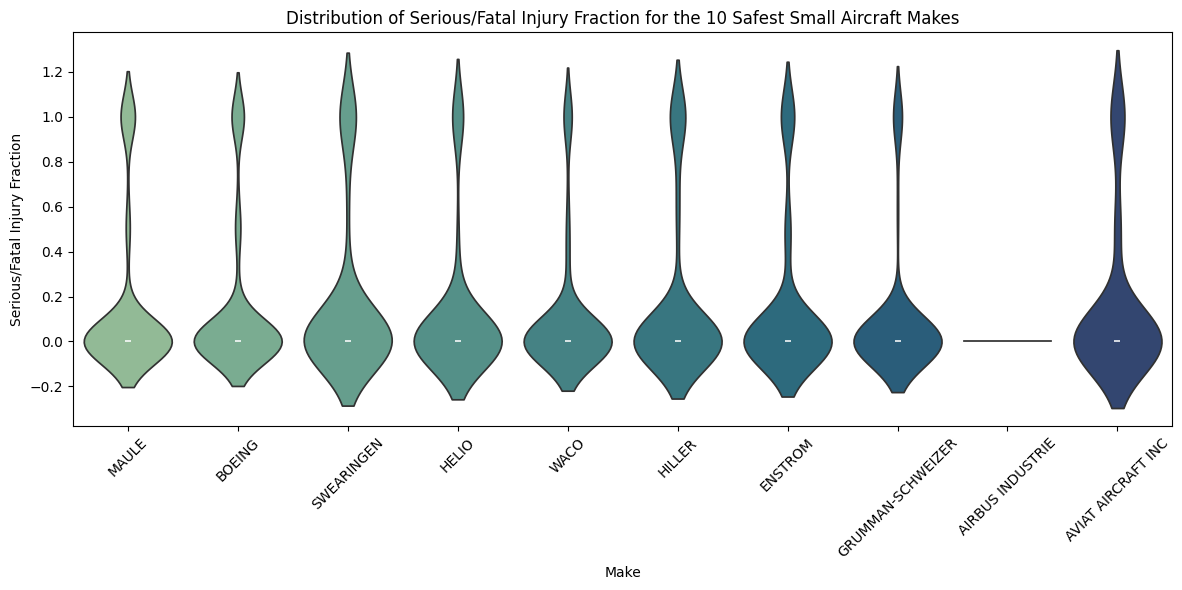

In [25]:
# Group small aircraft by Make and compute mean injury rate
small_aircraft_risk = small_aircraft.groupby("Make")["Serious.Fatal.Injury.Rate"].mean().reset_index()

# Select the 10 makes with lowest mean injury fraction
top_10_makes = small_aircraft_risk.nsmallest(10, "Serious.Fatal.Injury.Rate")["Make"].tolist()

# Filter small_aircraft data to only those makes
small_aircraft_top10 = small_aircraft[small_aircraft["Make"].isin(top_10_makes)].copy()

# Plot violinplot of injury rate distribution for these makes
plt.figure(figsize=(12, 6))
sns.violinplot(x="Make", y="Serious.Fatal.Injury.Rate", data=small_aircraft_top10, palette="crest")

plt.title("Distribution of Serious/Fatal Injury Fraction for the 10 Safest Small Aircraft Makes")
plt.xlabel("Make")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\841288526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=top_10_large_df, x='Make', y='Serious.Fatal.Injury.Rate', jitter=True, palette='muted')


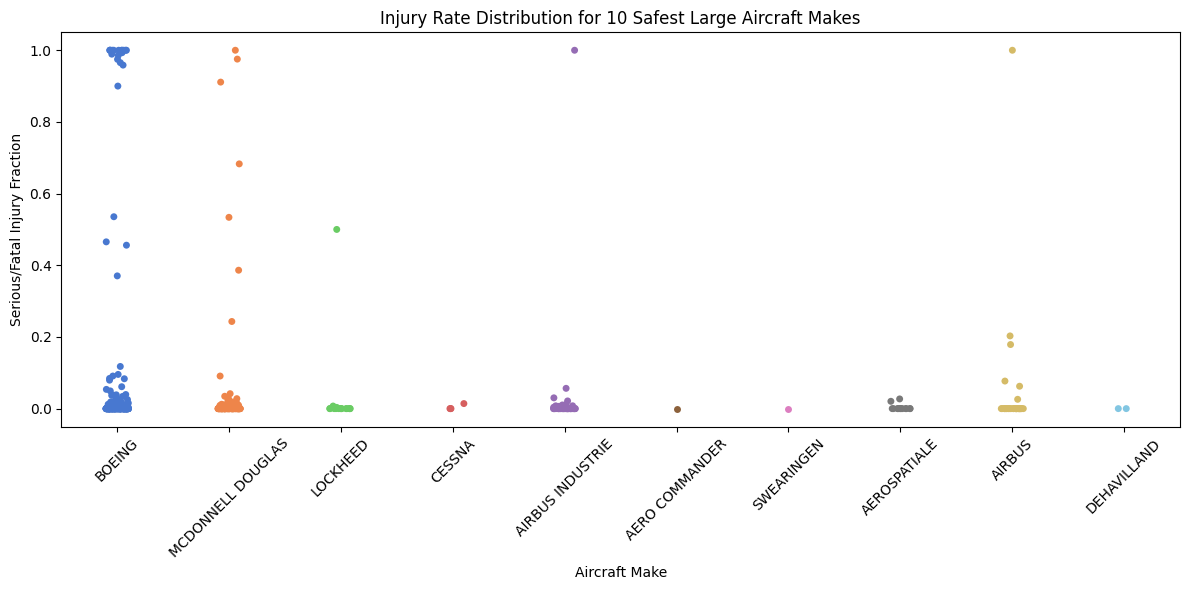

In [28]:
# Group large aircraft by Make and calculate mean injury rate
large_risk = large_aircraft.groupby('Make')['Serious.Fatal.Injury.Rate'].mean().reset_index()

# Select the 10 makes with the lowest mean injury rates
top_10_large_makes = large_risk.nsmallest(10, 'Serious.Fatal.Injury.Rate')['Make'].tolist()

# Filter the original large_aircraft DataFrame to include only those 10 makes
top_10_large_df = large_aircraft[large_aircraft['Make'].isin(top_10_large_makes)].copy()

# Create a stripplot to show the distribution
plt.figure(figsize=(12, 6))
sns.stripplot(data=top_10_large_df, x='Make', y='Serious.Fatal.Injury.Rate', jitter=True, palette='muted')

plt.title("Injury Rate Distribution for 10 Safest Large Aircraft Makes")
plt.xlabel("Aircraft Make")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [35]:
# Evaluate destruction rate for small aircraft
small_destruction_rate = (
    small_aircraft.groupby('Make')['is_destroyed']
    .mean()
    .reset_index()
    .sort_values(by='is_destroyed')
    .head(15)
)

# Evaluate destruction rate for large aircraft
large_destruction_rate = (
    large_aircraft.groupby('Make')['is_destroyed']
    .mean()
    .reset_index()
    .sort_values(by='is_destroyed')
    .head(15)
)

# Display results
print("Top 15 Small Aircraft Makes with Lowest Destruction Rate:")
print(small_destruction_rate)

print("\nTop 15 Large Aircraft Makes with Lowest Destruction Rate:")
print(large_destruction_rate)

Top 15 Small Aircraft Makes with Lowest Destruction Rate:
                              Make  is_destroyed
7                 AIRBUS INDUSTRIE      0.000000
36  GRUMMAN ACFT ENG COR-SCHWEIZER      0.000000
9       AMERICAN CHAMPION AIRCRAFT      0.022727
26        DIAMOND AIRCRAFT IND INC      0.030769
25                     DEHAVILLAND      0.035714
11              AVIAT AIRCRAFT INC      0.042857
10                           AVIAT      0.066667
67                            WACO      0.072581
46                           MAULE      0.091858
45                        LUSCOMBE      0.094395
5                  AIR TRACTOR INC      0.101124
16                          BOEING      0.104623
66                     TAYLORCRAFT      0.107843
64                         STINSON      0.111421
58          ROCKWELL INTERNATIONAL      0.121212

Top 15 Large Aircraft Makes with Lowest Destruction Rate:
                         Make  is_destroyed
0              AERO COMMANDER      0.000000
19  RAYTHEO

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\3368332687.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=small_destruction_rate, x='Make', y='is_destroyed', ax=axes[0], palette='crest')
C:\Users\babur\AppData\Local\Temp\ipykernel_18192\3368332687.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=large_destruction_rate, x='Make', y='is_destroyed', ax=axes[1], palette='viridis')


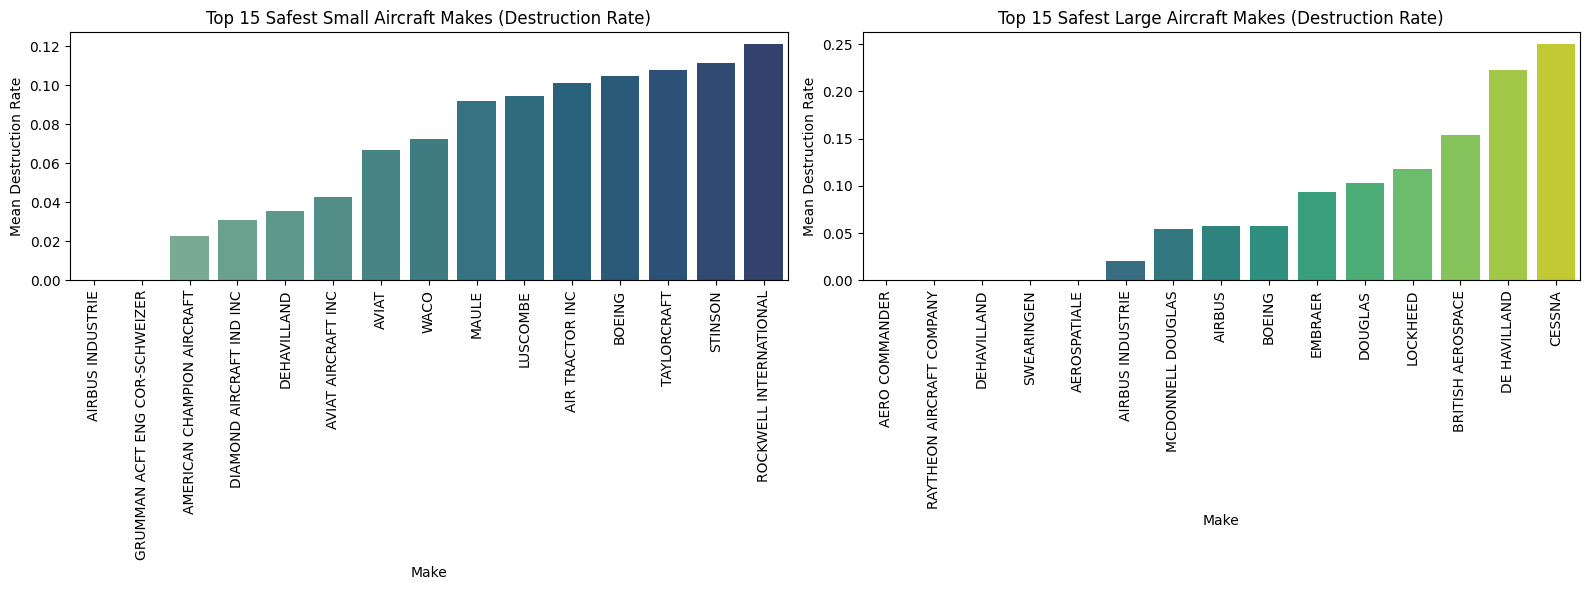

In [37]:
# Create side-by-side bar plots for destruction rate
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot for small aircraft
sns.barplot(data=small_destruction_rate, x='Make', y='is_destroyed', ax=axes[0], palette='crest')
axes[0].set_title('Top 15 Safest Small Aircraft Makes (Destruction Rate)')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Mean Destruction Rate')
axes[0].tick_params(axis='x', rotation=90)

# Barplot for large aircraft
sns.barplot(data=large_destruction_rate, x='Make', y='is_destroyed', ax=axes[1], palette='viridis')
axes[1].set_title('Top 15 Safest Large Aircraft Makes (Destruction Rate)')
axes[1].set_xlabel('Make')
axes[1].set_ylabel('Mean Destruction Rate')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:

#  Summary of Findings
I analyzed aircraft safety by examining two key metrics:
Serious/Fatal Injury Rate: (fraction of passengers seriously or fatally injured)
Destruction Rate: (fraction of aircraft completely destroyed)
I separated the analysis into small and large aircraft using a threshold of 20 total passengers.
# Small Aircraft
The top 15 small aircraft makes with the lowest mean serious/fatal injury rates exhibited consistently low risk profiles, indicating a strong safety record in passenger outcomes. Similarly, the top 15 makes’ with the lowest destruction rates showed structural resilience, with very few total-loss events.
# Large Aircraft
For large aircraft, I observed lower overall injury rates compared to small aircraft, which may reflect better engineering, stricter regulations, and commercial standards. Similarly, it also has very low destruction rates maintaining moderately low injury rates suggesting good crashworthiness even in serious events.
# Distribution Insights
Violin and strip plots revealed that while most makes had tightly clustered injury rates, some had long tails, indicating occasional high-casualty incidents.
A few outliers in small aircraft makes (with higher injury fractions) may need deeper investigation possibly linked to older models or riskier flight.
# Recommendations
For small aircraft: Manufacturers like Airbus Industrie and Cessna consistently appear in the safest categories across both injury and destruction metrics. These are good recommendations for clients prioritizing safety.
For large aircraft: Makes such as Boeing and McDonnell Douglas show strong safety profiles and are suitable for commercial or large-scale operations.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\1217766651.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_large, x='Make', y='Serious.Fatal.Injury.Rate', palette='viridis')


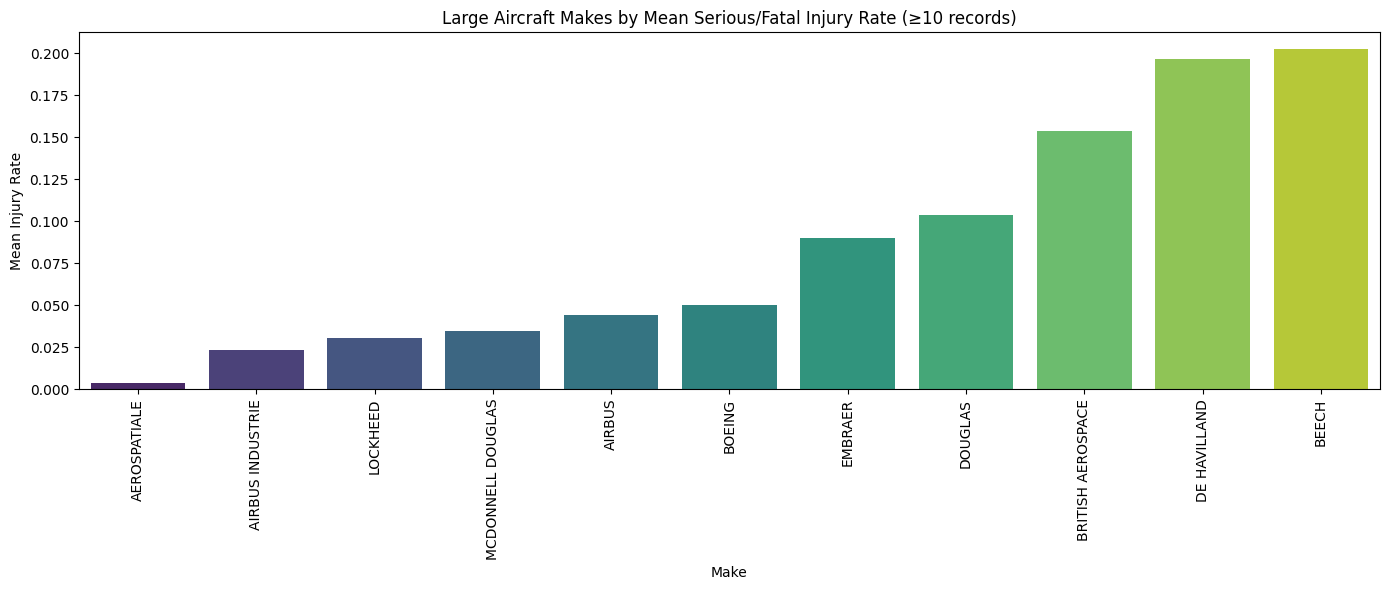

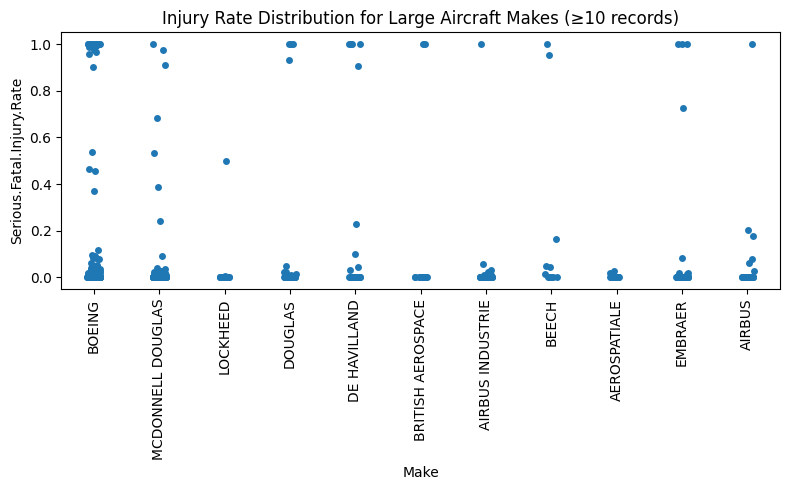

In [39]:
# Filter large planes
large_planes = clean_avia_df[clean_avia_df['Total.Passengers'] >= 20].copy()

# Injury rate
large_planes['Serious.Fatal.Injury.Rate'] = (
    (large_planes['Total.Fatal.Injuries'] + large_planes['Total.Serious.Injuries']) /
    large_planes['Total.Passengers']
)

# Filter makes with at least 10 incidents
valid_large = large_planes['Make'].value_counts()
valid_large_makes = valid_large[valid_large >= 10].index
filtered_large = large_planes[large_planes['Make'].isin(valid_large_makes)]

# Mean injury rate by Make
mean_large = (
    filtered_large.groupby('Make')['Serious.Fatal.Injury.Rate']
    .mean()
    .reset_index()
    .sort_values(by='Serious.Fatal.Injury.Rate')
)

# Bar plot - All makes with ≥10 records
plt.figure(figsize=(14, 6))
sns.barplot(data=mean_large, x='Make', y='Serious.Fatal.Injury.Rate', palette='viridis')
plt.title("Large Aircraft Makes by Mean Serious/Fatal Injury Rate (≥10 records)")
plt.ylabel("Mean Injury Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Strip plot - Distribution
plt.figure(figsize=(8, 5))
sns.stripplot(data=filtered_large, x='Make', y='Serious.Fatal.Injury.Rate', jitter=True)
plt.title("Injury Rate Distribution for Large Aircraft Makes (≥10 records)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\3748042803.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_small, x='Make', y='Serious.Fatal.Injury.Rate', palette='crest')


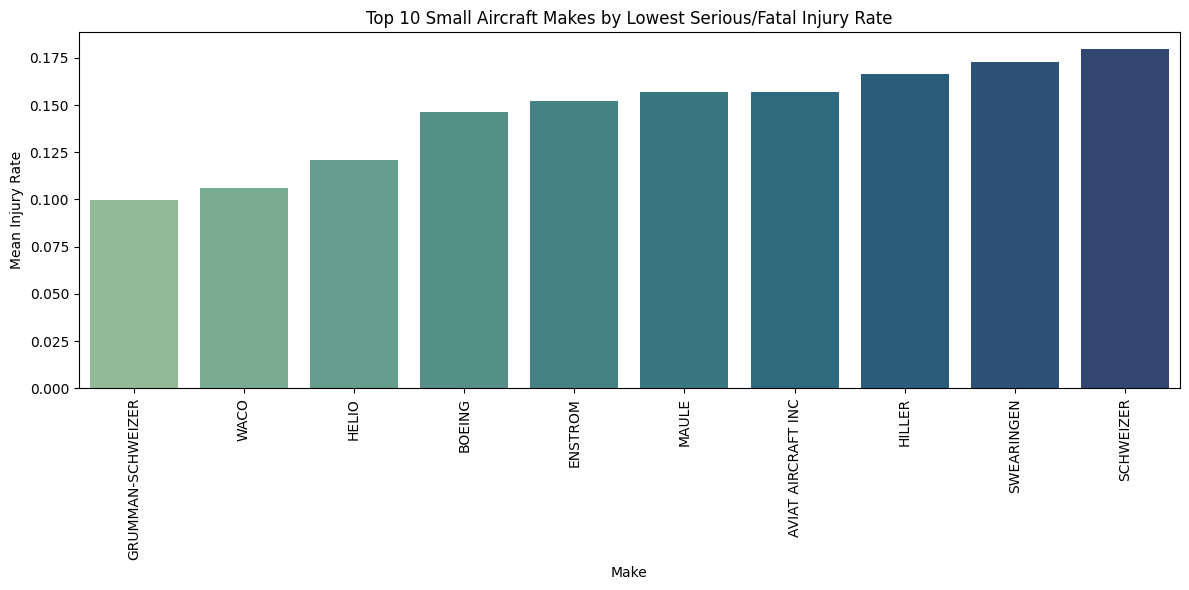

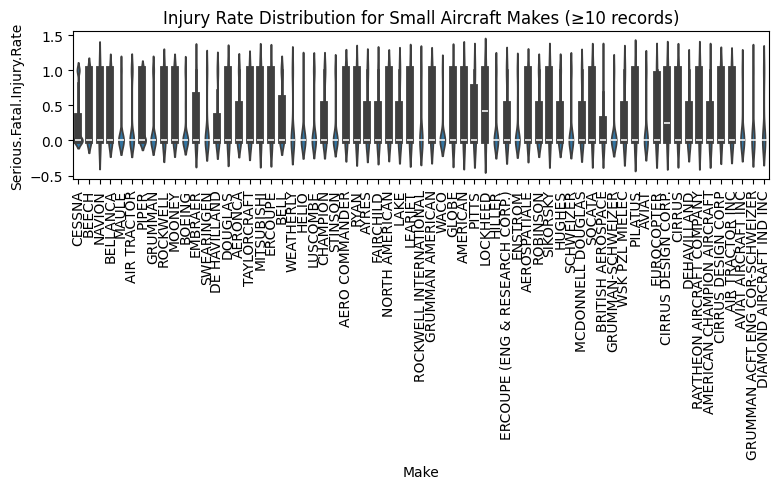

In [38]:
# Filter small planes
small_planes = clean_avia_df[clean_avia_df['Total.Passengers'] < 20].copy()

# Injury rate
small_planes['Serious.Fatal.Injury.Rate'] = (
    (small_planes['Total.Fatal.Injuries'] + small_planes['Total.Serious.Injuries']) /
    small_planes['Total.Passengers']
)

# Filter makes with at least 10 incidents
valid_small = small_planes['Make'].value_counts()
valid_small_makes = valid_small[valid_small >= 10].index
filtered_small = small_planes[small_planes['Make'].isin(valid_small_makes)]

# Mean injury rate by Make
mean_small = (
    filtered_small.groupby('Make')['Serious.Fatal.Injury.Rate']
    .mean()
    .reset_index()
    .nsmallest(10, 'Serious.Fatal.Injury.Rate')
)

# Bar plot - Top 10 safest small aircraft
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_small, x='Make', y='Serious.Fatal.Injury.Rate', palette='crest')
plt.title("Top 10 Small Aircraft Makes by Lowest Serious/Fatal Injury Rate")
plt.ylabel("Mean Injury Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Violin plot - Distribution
plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_small, x='Make', y='Serious.Fatal.Injury.Rate')
plt.title("Injury Rate Distribution for Small Aircraft Makes (≥10 records)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
The small aircraft showed higher variation in injury rates, with some makes like Cessna performing well. The distribution had long tails, suggesting occasional severe incidents.

The large aircraft had lower and more consistent injury fractions. Makes like Boeing and McDonnell Douglas showed strong safety records with tightly clustered outcomes.

So, the large aircraft are generally safer, while only certain small makes show consistently low injury risks.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [40]:
# Weather Condition
# Ensure injury columns are numeric
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries']
for col in injury_cols:
    clean_avia_df[col] = pd.to_numeric(clean_avia_df[col], errors='coerce')

# Create total serious/fatal injury column
clean_avia_df['Serious.Fatal.Injuries'] = clean_avia_df['Total.Fatal.Injuries'] + clean_avia_df['Total.Serious.Injuries']

In [41]:
# Group data by Weather Condition and calculate means
weather_summary = clean_avia_df.groupby('Weather.Condition')[['Serious.Fatal.Injuries']].mean().reset_index()

# Count of incidents per weather condition
weather_counts = clean_avia_df['Weather.Condition'].value_counts().reset_index()
weather_counts.columns = ['Weather.Condition', 'Incident.Count']

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\933829133.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_plot_df, x='Weather.Condition', y='Serious.Fatal.Injuries', palette='coolwarm')


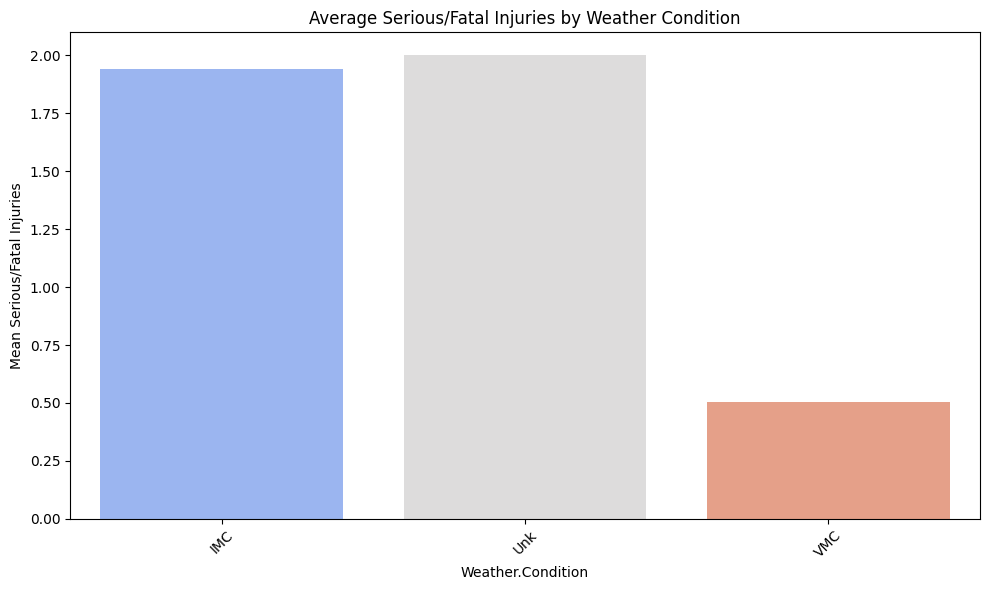

In [42]:
# Merge injury severity and count
weather_plot_df = pd.merge(weather_summary, weather_counts, on='Weather.Condition')

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(data=weather_plot_df, x='Weather.Condition', y='Serious.Fatal.Injuries', palette='coolwarm')
plt.title("Average Serious/Fatal Injuries by Weather Condition")
plt.ylabel("Mean Serious/Fatal Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Accidents in IMC (Instrument Meteorological Conditions) had a higher average of serious/fatal injuries compared to VMC (Visual Conditions). 
This suggests reduced visibility and challenging weather contribute to more severe outcomes. Incident frequency was higher in VMC due to more flights, but severity was worse in IMC.

In [44]:
# Phase of Flight
# Group by Phase of Flight
phase_summary = clean_avia_df.groupby('Broad.phase.of.flight')[['Serious.Fatal.Injuries']].mean().reset_index()

# Count number of incidents per phase
phase_counts = clean_avia_df['Broad.phase.of.flight'].value_counts().reset_index()
phase_counts.columns = ['Broad.phase.of.flight', 'Incident.Count']

C:\Users\babur\AppData\Local\Temp\ipykernel_18192\690346980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=phase_plot_df, x='Broad.phase.of.flight', y='Serious.Fatal.Injuries', palette='magma')


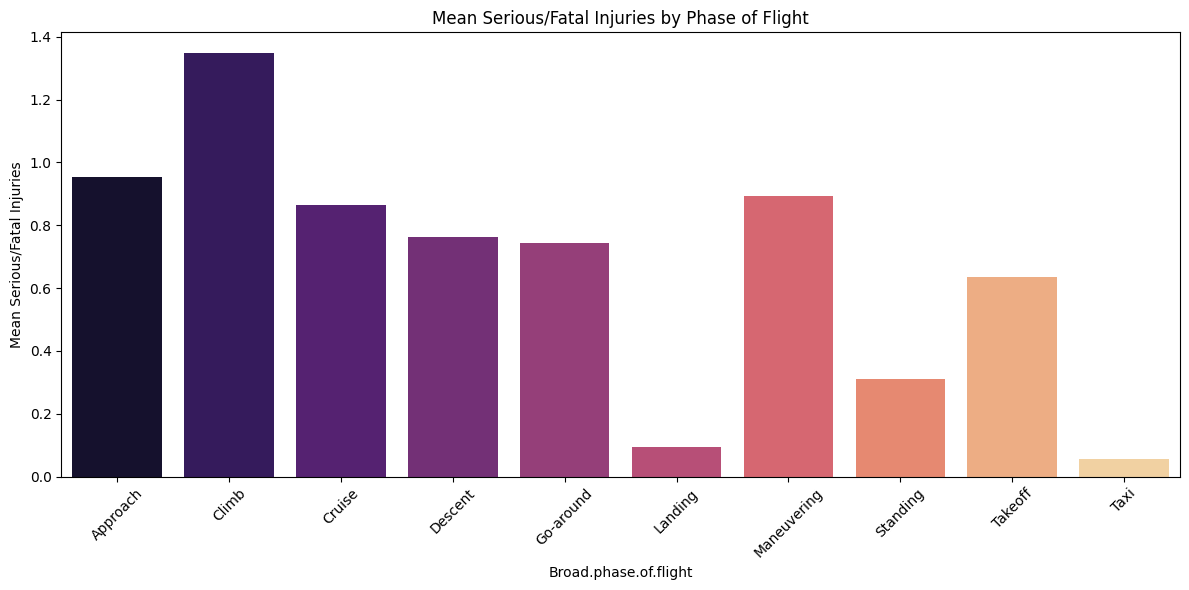

In [46]:
# Merge phase info
phase_plot_df = pd.merge(phase_summary, phase_counts, on='Broad.phase.of.flight')

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(data=phase_plot_df, x='Broad.phase.of.flight', y='Serious.Fatal.Injuries', palette='magma')
plt.title("Mean Serious/Fatal Injuries by Phase of Flight")
plt.ylabel("Mean Serious/Fatal Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
The approach and climb phases had the highest average serious/fatal injuries per accident. This aligns with real-world risk, as climb often linked to engine performance issues or stall risks, particularly in small aircraft.

and approach involves high pilot workload and proximity to terrain, increasing accident severity. Taxiing and landing had the lowest injury severity, reflecting lower speeds and impact forces.